
IRIS Dataset Analysis

Dataset: iris.csv
K value: 3
Feature scaling: No

Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



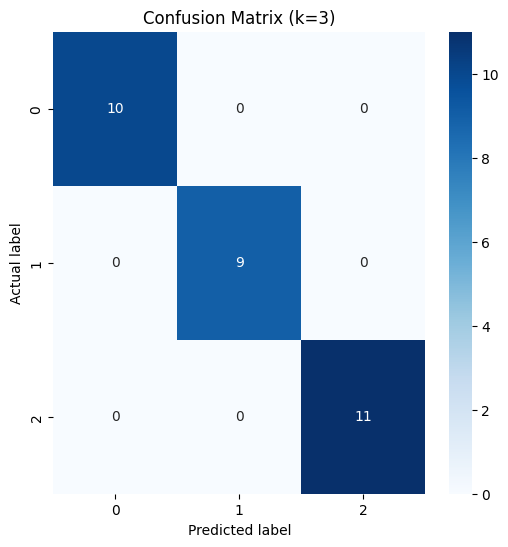

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

def knn_classifier(dataset_path, target_column, k_value, scale_features=False):
    # Load dataset
    df = pd.read_csv(dataset_path)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Feature scaling if required
    if scale_features:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Display results
    print(f"\nDataset: {dataset_path}")
    print(f"K value: {k_value}")
    print(f"Feature scaling: {'Yes' if scale_features else 'No'}")
    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Confusion Matrix (k={k_value})")

    return accuracy, cm

# Get user input for k value
k_value=3

# IRIS Dataset
print("\n" + "="*50)
print("IRIS Dataset Analysis")
print("="*50)
iris_accuracy, iris_cm = knn_classifier(
    'iris.csv', 'species', k_value, scale_features=False)


Diabetes Dataset Analysis

Dataset: diabetes.csv
K value: 3
Feature scaling: Yes

Accuracy: 0.7078

Confusion Matrix:
[[81 18]
 [27 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



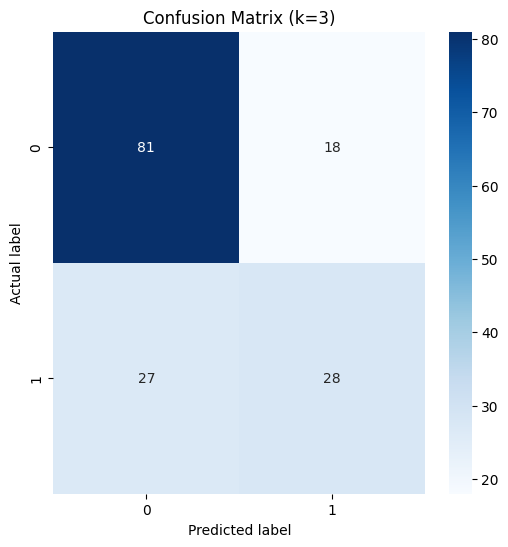

In [17]:
print("\n" + "="*50)
print("Diabetes Dataset Analysis")
print("="*50)
diabetes_accuracy, diabetes_cm = knn_classifier(
    'diabetes.csv', 'Outcome', k_value, scale_features=True)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       1

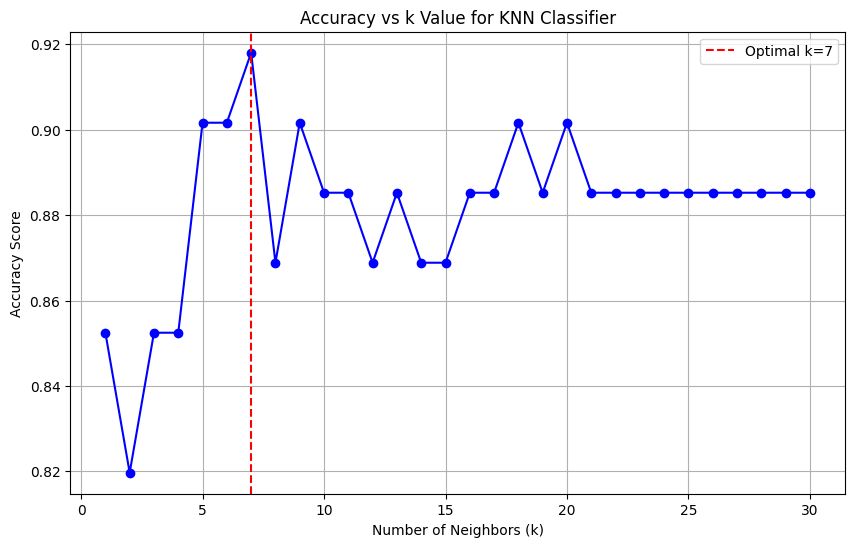

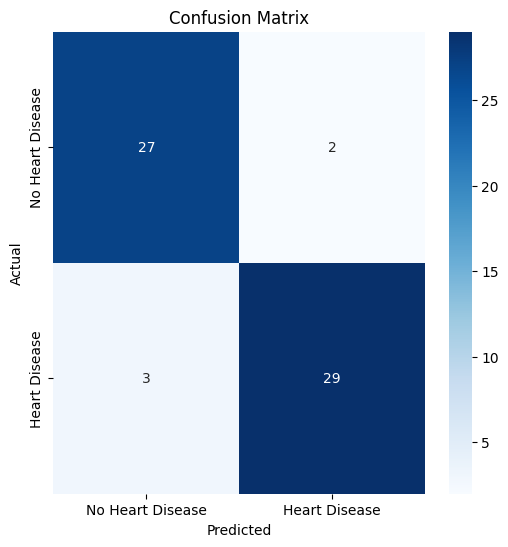


Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.90      0.93      0.92        29
   Heart Disease       0.94      0.91      0.92        32

        accuracy                           0.92        61
       macro avg       0.92      0.92      0.92        61
    weighted avg       0.92      0.92      0.92        61


Optimal k value: 7
Maximum accuracy: 0.9180


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Display basic info
print("Dataset Info:")
print(heart_df.info())
print("\nFirst 5 rows:")
print(heart_df.head())

# Prepare features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal k value
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

optimal_k = k_values[np.argmax(accuracies)]
max_accuracy = max(accuracies)

# Plot accuracy vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs k Value for KNN Classifier')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()
plt.grid()
plt.show()

# Train final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
y_pred = final_knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                           target_names=['No Heart Disease', 'Heart Disease']))

# Display results
print(f"\nOptimal k value: {optimal_k}")
print(f"Maximum accuracy: {max_accuracy:.4f}")